A1

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# 1. Load and preprocess data
def prepare_dataset(csv_path):
    """
    Reads the mental health dataset, encodes categorical columns,
    and returns feature and target arrays for model training.
    """
    df = pd.read_csv(csv_path)
    # Remove rows with missing values
    df = df.dropna()
    # Encode the target (Mental_Health_Condition: 0/1)
    target_encoder = LabelEncoder()
    df['Mental_Health_Condition'] = target_encoder.fit_transform(df['Mental_Health_Condition'])
    # Potential input columns for model
    potential_inputs = ['Sleep_Hours', 'Work_Hours', 'Stress_Level', 'Social_Media_Usage']
    # Use only columns that exist in the dataset
    used_features = [col for col in potential_inputs if col in df.columns]

    # Separate features and target
    X = df[used_features].copy()
    y = df['Mental_Health_Condition']

    # Encode any non-numeric feature columns
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = LabelEncoder().fit_transform(X[col])

    return X, y
# 2. Train KNN model
def build_knn_model(X_train, y_train, neighbors=5):
    """
    Trains a k-Nearest Neighbors classifier with the specified number of neighbors.
    """
    knn_classifier = KNeighborsClassifier(n_neighbors=neighbors)
    knn_classifier.fit(X_train, y_train)
    return knn_classifier

# 3. Evaluate model
def assess_model_performance(model, X_data, y_data):
    """
    Returns confusion matrix, precision, recall, and F1-score for the given model and data.
    """
    predictions = model.predict(X_data)
    cm = confusion_matrix(y_data, predictions)
    precision = precision_score(y_data, predictions, average='binary')
    recall = recall_score(y_data, predictions, average='binary')
    f1 = f1_score(y_data, predictions, average='binary')
    return cm, precision, recall, f1

# 4. Main Workflow

X_data, y_data = prepare_dataset('/content/MHDS (2).csv')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.3, random_state=42
)

# Train KNN model
knn_model = build_knn_model(X_train, y_train, neighbors=5)

# Evaluate on train and test sets
train_cm, train_prec, train_rec, train_f1 = assess_model_performance(knn_model, X_train, y_train)
test_cm, test_prec, test_rec, test_f1 = assess_model_performance(knn_model, X_test, y_test)
# 5. Display Results
print("=== Training Performance ===")
print("Confusion Matrix:\n", train_cm)
print(f"Precision: {train_prec:.2f}")
print(f"Recall: {train_rec:.2f}")
print(f"F1 Score: {train_f1:.2f}")

print("\n=== Testing Performance ===")
print("Confusion Matrix:\n", test_cm)
print(f"Precision: {test_prec:.2f}")
print(f"Recall: {test_rec:.2f}")
print(f"F1 Score: {test_f1:.2f}")
# Assess if model is underfitting, overfitting, or balanced
if abs(train_f1 - test_f1) < 0.1:
    print("\nModel Evaluation: Well-Fitted / Balanced")
elif train_f1 > test_f1:
    print("\nModel Evaluation: Possible Overfitting")
else:
    print("\nModel Evaluation: Possible Underfitting")


=== Training Performance ===
Confusion Matrix:
 [[6066 2717]
 [2738 5977]]
Precision: 0.69
Recall: 0.69
F1 Score: 0.69

=== Testing Performance ===
Confusion Matrix:
 [[1810 1902]
 [1928 1860]]
Precision: 0.49
Recall: 0.49
F1 Score: 0.49

Model Evaluation: Possible Overfitting


A2

Regression Model Evaluation:
Mean Squared Error: 164.1921
Root MSE: 12.8137
MAPE: 0.0051
R² Score: 0.9973


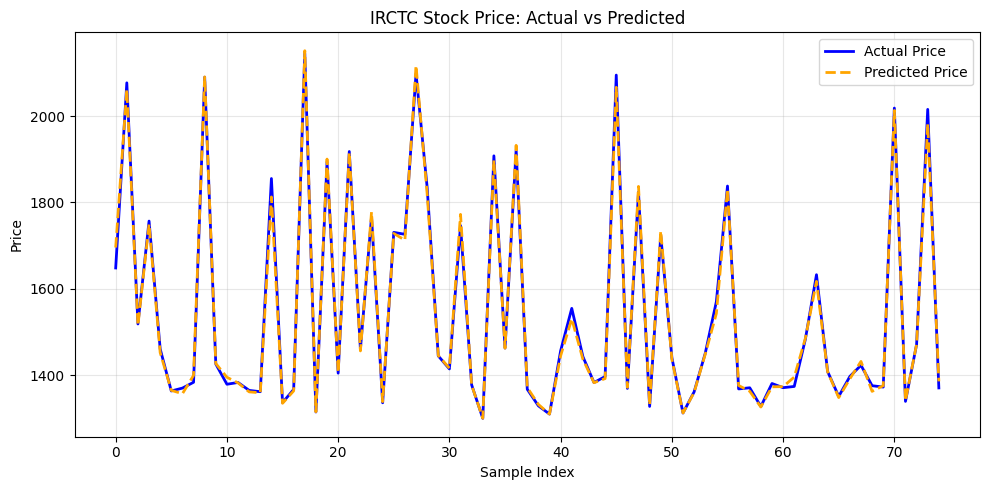

In [21]:
#      IRCTC Stock Prediction   #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
# 1. Convert string volumes (1.2M, 3B) to numbers
def clean_volume_values(df, col='Volume'):
    """
    Converts stock volume strings like '1.2M', '500K' to numeric values.
    """
    def convert_volume(val):
        val = str(val).strip()
        if val.endswith('K'):
            return float(val[:-1]) * 1_000
        elif val.endswith('M'):
            return float(val[:-1]) * 1_000_000
        elif val.endswith('B'):
            return float(val[:-1]) * 1_000_000_000
        return float(val)

    df[col] = df[col].apply(convert_volume)
    return df
# 2. Load and preprocess stock data
def load_stock_data(file_path):
    """
    Reads stock data from Excel (Sheet 2), cleans volume and removes missing rows.
    Returns DataFrame, feature matrix, and target vector.
    """
    data = pd.read_excel(file_path, sheet_name=1)  # Sheet 2 has index 1
    data = clean_volume_values(data, 'Volume')
    data.dropna(inplace=True)

    # Feature matrix (Open, High, Low, Volume)
    X = data[['Open', 'High', 'Low', 'Volume']].values
    # Target vector (Price)
    y = data['Price'].values
    return data, X, y
# 3. Split dataset into train and test
def split_data(X, y, test_fraction=0.3):
    """
    Splits the data into training and testing sets.
    """
    return train_test_split(X, y, test_size=test_fraction, random_state=42)
# 4. Train Linear Regression model
def train_model(X_train, y_train):
    """
    Fits a linear regression model on training data.
    """
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model
# 5. Evaluate model performance
def evaluate_regression(model, X_test, y_test):
    """
    Computes regression metrics and returns predictions.
    """
    y_pred = model.predict(X_test)

    mse_val = mean_squared_error(y_test, y_pred)
    rmse_val = np.sqrt(mse_val)
    mape_val = mean_absolute_percentage_error(y_test, y_pred)
    r2_val = r2_score(y_test, y_pred)

    metrics = {
        'Mean Squared Error': mse_val,
        'Root MSE': rmse_val,
        'MAPE': mape_val,
        'R² Score': r2_val
    }
    return metrics, y_pred
# 6. Full pipeline execution
stock_df, X, y = load_stock_data("/content/Lab Session Data (1).xlsx")
X_train, X_test, y_train, y_test = split_data(X, y)
reg_model = train_model(X_train, y_train)
evaluation_results, predictions = evaluate_regression(reg_model, X_test, y_test)
# 7. Show metrics
print("Regression Model Evaluation:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value:.4f}")
# 8. Visualization
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Price', color='blue', linewidth=2)
plt.plot(predictions, label='Predicted Price', color='orange', linestyle='--', linewidth=2)
plt.title("IRCTC Stock Price: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


A3


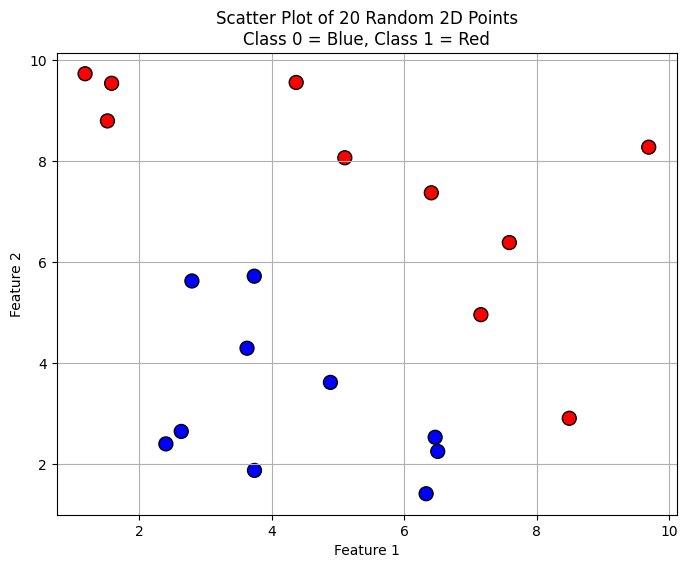

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 20 random 2D points between 1 and 10
np.random.seed(42)  # Ensure reproducibility of random numbers
points = np.random.uniform(1, 10, size=(20, 2))  # 20 samples with 2 features each

# Step 2: Assign class labels using a simple rule
# Rule: If x + y > 10 → Class 1 (Red), else → Class 0 (Blue)
class_labels = np.where(points[:, 0] + points[:, 1] > 10, 1, 0)

# Step 3: Assign colors based on class labels
point_colors = ['blue' if label == 0 else 'red' for label in class_labels]

# Step 4: Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], c=point_colors, edgecolor='k', s=100)
plt.title("Scatter Plot of 20 Random 2D Points\nClass 0 = Blue, Class 1 = Red")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


A4

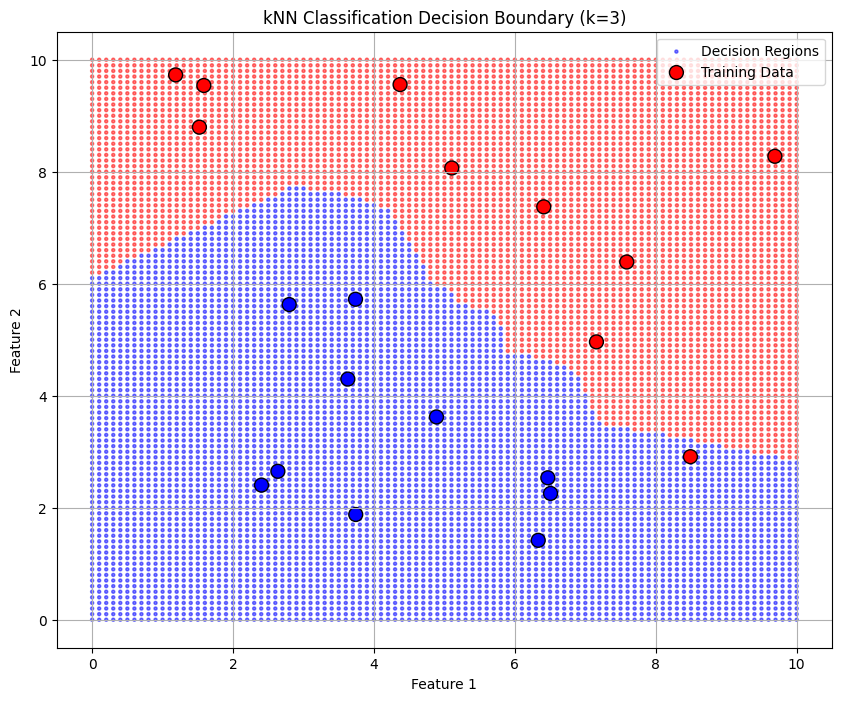

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Generate synthetic training data (20 random 2D points)
np.random.seed(42)
train_points = np.random.uniform(1, 10, size=(20, 2))  # 20 points in 2D
train_labels = np.where(train_points[:, 0] + train_points[:, 1] > 10, 1, 0)  # Class rule

# Step 2: Create a grid of test points to visualize decision regions
x_range = np.arange(0, 10.1, 0.1)
y_range = np.arange(0, 10.1, 0.1)
grid_x, grid_y = np.meshgrid(x_range, y_range)  # Create 2D grid
test_points = np.c_[grid_x.ravel(), grid_y.ravel()]  # Flatten to (N, 2) for prediction

# Step 3: Initialize and train kNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_points, train_labels)

# Step 4: Predict class for each test point in the grid
predicted_labels = knn_model.predict(test_points)

# Step 5: Plot decision regions and training data
plt.figure(figsize=(10, 8))

# Plot predicted regions
plt.scatter(
    test_points[:, 0], test_points[:, 1],
    c=['blue' if lbl == 0 else 'red' for lbl in predicted_labels],
    s=5, alpha=0.5, label='Decision Regions'
)

# Plot original training points
plt.scatter(
    train_points[:, 0], train_points[:, 1],
    c=['blue' if lbl == 0 else 'red' for lbl in train_labels],
    edgecolor='k', s=100, marker='o', label='Training Data'
)

# Step 6: Customize the plot
plt.title("kNN Classification Decision Boundary (k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()
plt.show()


A5

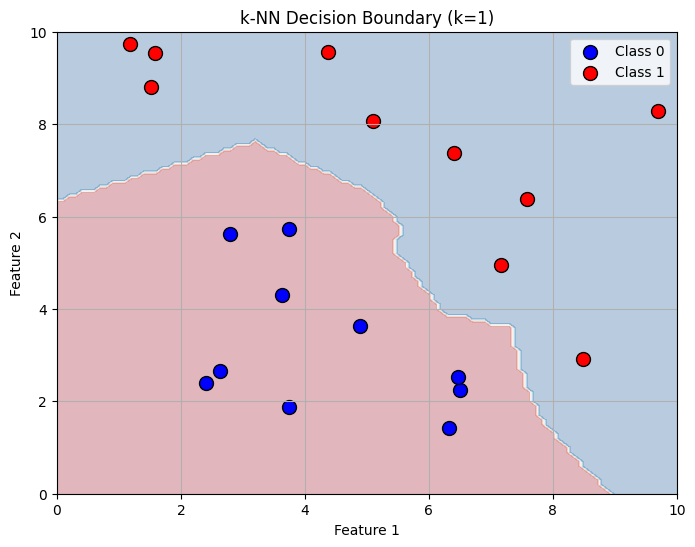

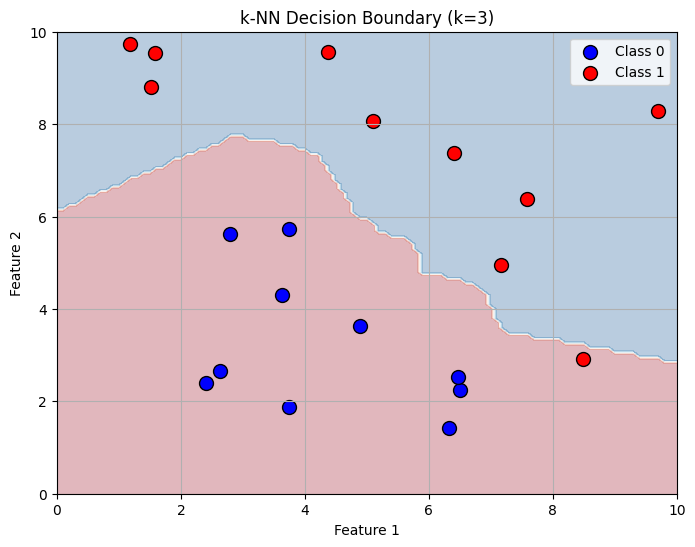

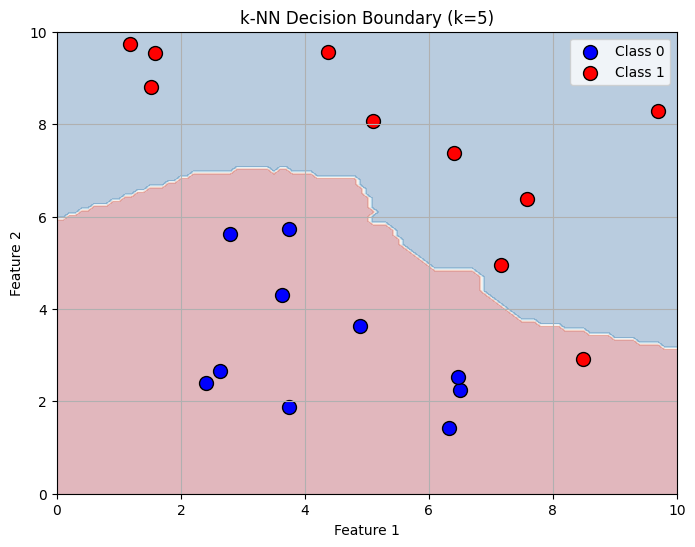

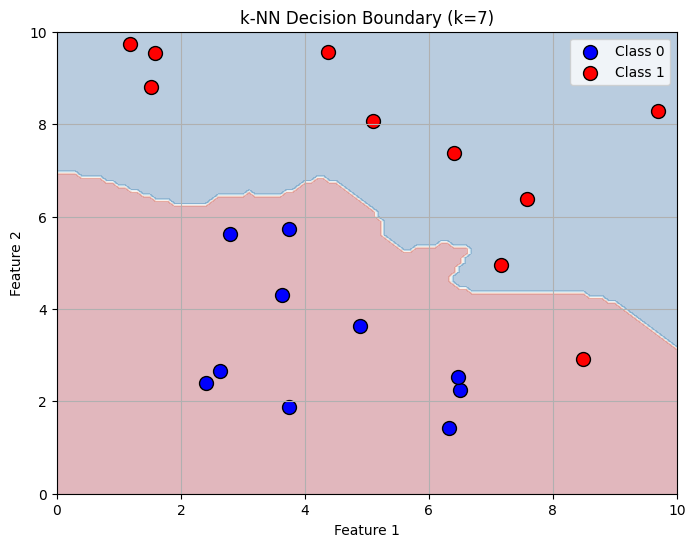

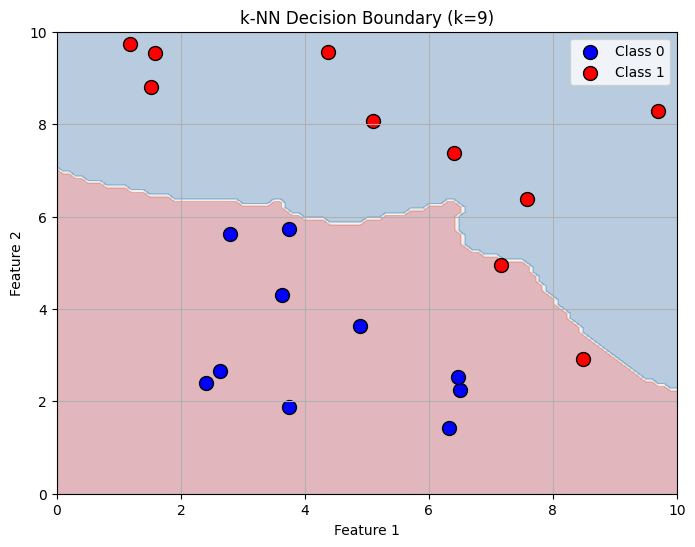

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def make_training_points(total_points=20, value_range=(1, 10), seed=42):
    """
    Create a small synthetic training dataset with two numerical features.
    Each point is assigned:
        1 if (feature1 + feature2) > 10
        0 otherwise
    """
    np.random.seed(seed)
    low, high = value_range
    features = np.random.uniform(low, high, size=(total_points, 2))
    labels = (features[:, 0] + features[:, 1] > 10).astype(int)
    return features, labels

def make_prediction_grid(step=0.1, axis_range=(0, 10)):
    """
    Create a 2D mesh of points for kNN prediction and visualization.
    Returns flattened grid coordinates and the mesh for plotting.
    """
    min_val, max_val = axis_range
    x_axis = np.arange(min_val, max_val + step, step)
    y_axis = np.arange(min_val, max_val + step, step)
    grid_x, grid_y = np.meshgrid(x_axis, y_axis)
    grid_points = np.c_[grid_x.ravel(), grid_y.ravel()]
    return grid_points, grid_x, grid_y

def knn_predict(features, labels, grid_points, k=3):
    """
    Train a k-Nearest Neighbors model and predict classes for grid points.
    """
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(features, labels)
    predictions = model.predict(grid_points)
    return predictions

def plot_knn_regions(features, labels, grid_x, grid_y, grid_predictions, k):
    """
    Display the decision regions of a kNN classifier along with training points.
    """
    plt.figure(figsize=(8, 6))

    # Reshape predictions for contour plotting
    z = grid_predictions.reshape(grid_x.shape)

    # Fill background with class colors
    plt.contourf(grid_x, grid_y, z, cmap=plt.cm.RdBu, alpha=0.3)

    # Plot training samples
    for class_val, color in zip([0, 1], ['blue', 'red']):
        idx = labels == class_val
        plt.scatter(features[idx, 0], features[idx, 1],
                    color=color, edgecolor='k', s=100, label=f'Class {class_val}')

    plt.title(f'k-NN Decision Boundary (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# === Main Script ===

# 1. Create synthetic training dataset
train_points, train_labels = make_training_points()

# 2. Create prediction grid for visualization
grid_points, mesh_x, mesh_y = make_prediction_grid()

# 3. Test multiple k values
for k_choice in [1, 3, 5, 7, 9]:
    predictions = knn_predict(train_points, train_labels, grid_points, k_choice)
    plot_knn_regions(train_points, train_labels, mesh_x, mesh_y, predictions, k_choice)


A6

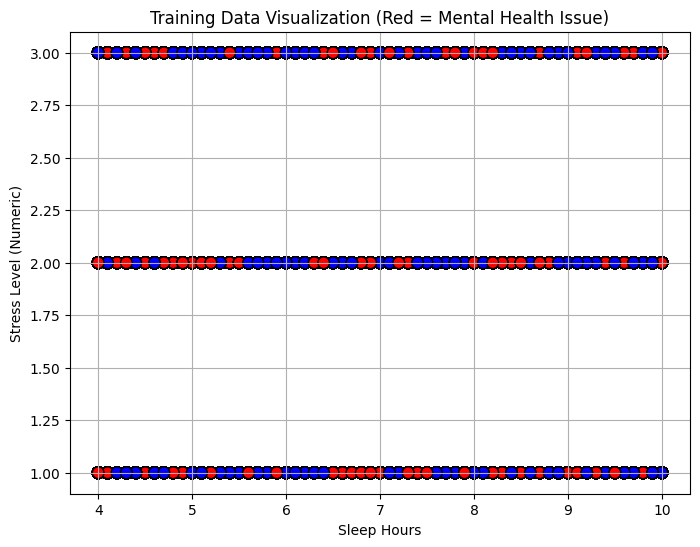

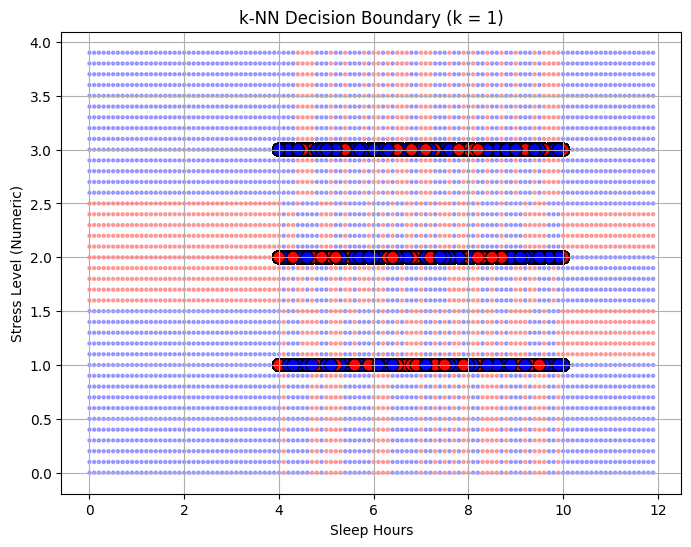

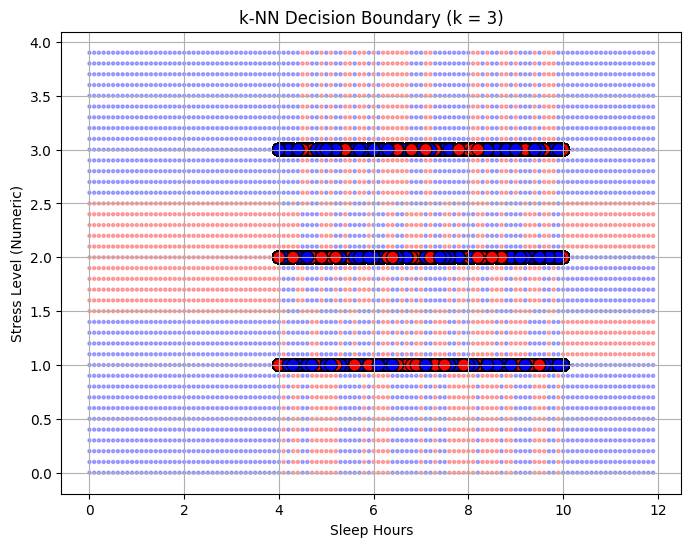

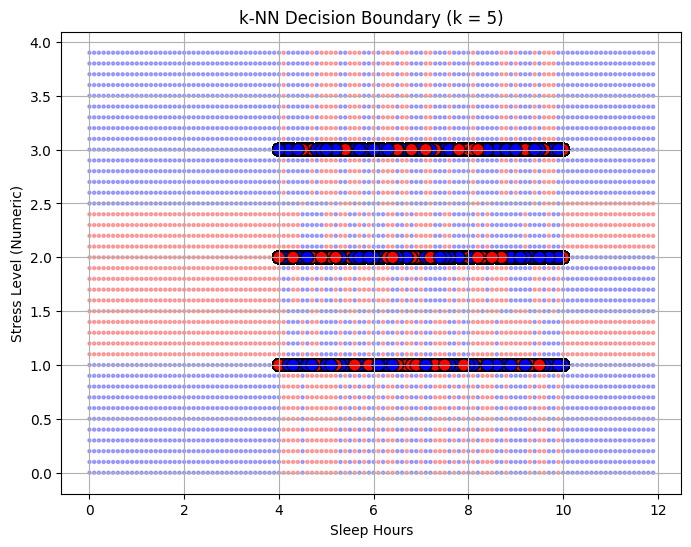

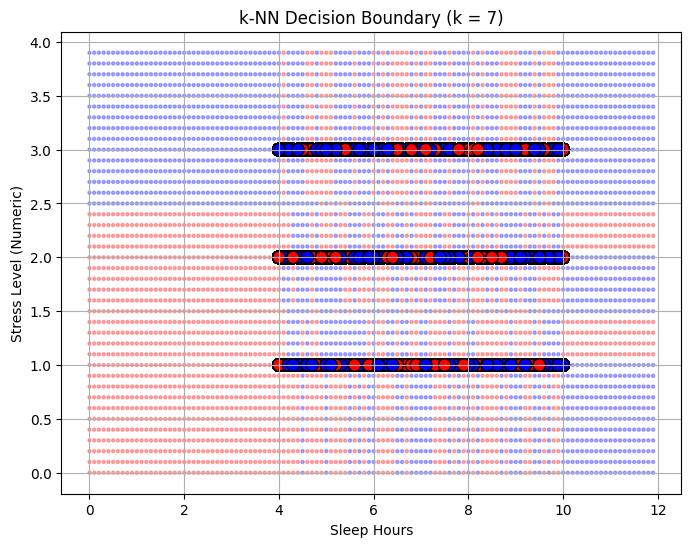

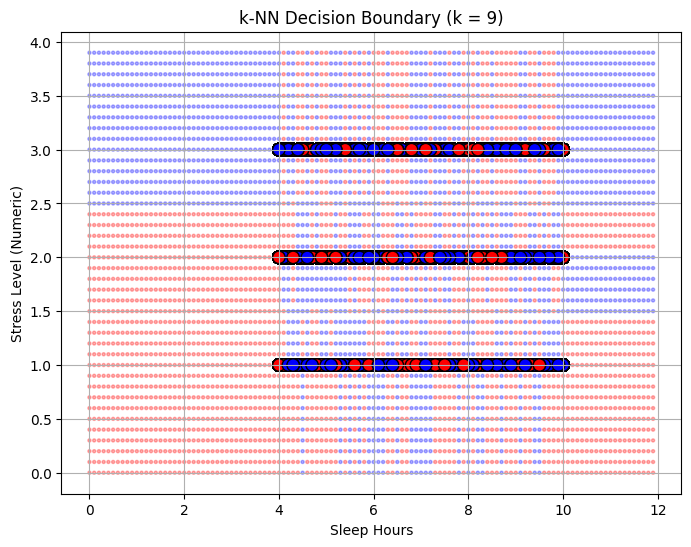

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# ---------------------------
# 1. Load and prepare dataset
# ---------------------------
mental_data = pd.read_csv('/content/MHDS (2).csv')

# Focus only on features related to sleep and stress, and the target outcome
feature_cols = ['Sleep_Hours', 'Stress_Level']
target_col = 'Mental_Health_Condition'

# Keep only relevant columns and remove rows with missing values
mental_data = mental_data[feature_cols + [target_col]].dropna()

# Convert stress levels to numeric codes for modeling
stress_to_num = {'Low': 1, 'Medium': 2, 'High': 3}
mental_data['Stress_Level'] = mental_data['Stress_Level'].map(stress_to_num)

# Encode the target as 0 and 1
label_enc = LabelEncoder()
mental_data[target_col] = label_enc.fit_transform(mental_data[target_col])

# Separate features and target values
train_X = mental_data[feature_cols].values
train_y = mental_data[target_col].values

# ---------------------------
# 2. Visualize training data
# ---------------------------
plt.figure(figsize=(8, 6))
colors = ['blue' if lbl == 0 else 'red' for lbl in train_y]
plt.scatter(train_X[:, 0], train_X[:, 1], c=colors, s=70, edgecolor='k')
plt.xlabel('Sleep Hours')
plt.ylabel('Stress Level (Numeric)')
plt.title('Training Data Visualization (Red = Mental Health Issue)')
plt.grid(True)
plt.show()

# ---------------------------
# 3. Generate a testing grid
# ---------------------------
x_limits = (0, 12)
y_limits = (0, 4)

x_points = np.arange(x_limits[0], x_limits[1], 0.1)
y_points = np.arange(y_limits[0], y_limits[1], 0.1)

grid_x, grid_y = np.meshgrid(x_points, y_points)
grid_samples = np.c_[grid_x.ravel(), grid_y.ravel()]

# ---------------------------
# 4. Train and visualize kNN for different k values
# ---------------------------
k_choices = [1, 3, 5, 7, 9]

for k_option in k_choices:
    # Fit KNN model
    knn_clf = KNeighborsClassifier(n_neighbors=k_option)
    knn_clf.fit(train_X, train_y)

    # Predict for the grid
    grid_predictions = knn_clf.predict(grid_samples)

    # Decision boundary visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(
        grid_samples[:, 0], grid_samples[:, 1],
        c=['blue' if pred == 0 else 'red' for pred in grid_predictions],
        s=5, alpha=0.3
    )
    plt.scatter(
        train_X[:, 0], train_X[:, 1],
        c=colors, edgecolor='k', s=80
    )
    plt.title(f'k-NN Decision Boundary (k = {k_option})')
    plt.xlabel('Sleep Hours')
    plt.ylabel('Stress Level (Numeric)')
    plt.grid(True)
    plt.show()


A7

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# -------------------------
# 1. Load and clean dataset
# -------------------------
mental_health_df = pd.read_csv('/content/MHDS (2).csv')

# Keep only relevant features and the target variable
input_features = ['Sleep_Hours', 'Stress_Level']
output_label = 'Mental_Health_Condition'

# Remove any rows with missing values
mental_health_df = mental_health_df[input_features + [output_label]].dropna()

# Convert stress levels to numeric values for modeling
stress_encoding = {'Low': 1, 'Medium': 2, 'High': 3}
mental_health_df['Stress_Level'] = mental_health_df['Stress_Level'].map(stress_encoding)

# Encode the target (0/1)
label_encoder = LabelEncoder()
mental_health_df[output_label] = label_encoder.fit_transform(mental_health_df[output_label])

# Separate features and target arrays
X_data = mental_health_df[input_features].values
y_data = mental_health_df[output_label].values

# -------------------------
# 2. Set up KNN and Grid Search
# -------------------------
knn_model = KNeighborsClassifier()

# Define search space for k (number of neighbors)
neighbors_range = {'n_neighbors': list(range(1, 21))}

# 5-fold cross-validation to find best k
grid_search = GridSearchCV(knn_model, neighbors_range, cv=5, scoring='accuracy')
grid_search.fit(X_data, y_data)

# -------------------------
# 3. Display results
# -------------------------
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Optimal k value: {best_k}")
print(f"Best 5-fold CV Accuracy: {best_score:.4f}")


Optimal k value: 1
Best 5-fold CV Accuracy: 0.5015
